In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('UN_city_pop_projections_long.csv')

In [4]:
df = df[df['Country_or_area']=='Zambia']

In [5]:
df = df.reset_index()

In [6]:
df = df.drop(columns=['index','Unnamed: 0','Region','Country_Code','City_Code','Country_or_area','City_Definition','Latitude','Longitude'])

In [7]:
df

,City,year,population
0,Kitwe,1950,45.887
1,Lusaka,1950,31.169
2,Ndola,1950,30.621
3,Kitwe,1951,49.552
4,Lusaka,1951,34.691
...,...,...,...
253,Lusaka,2034,4989.296
254,Ndola,2034,891.191
255,Kitwe,2035,1220.761
256,Lusaka,2035,5182.669


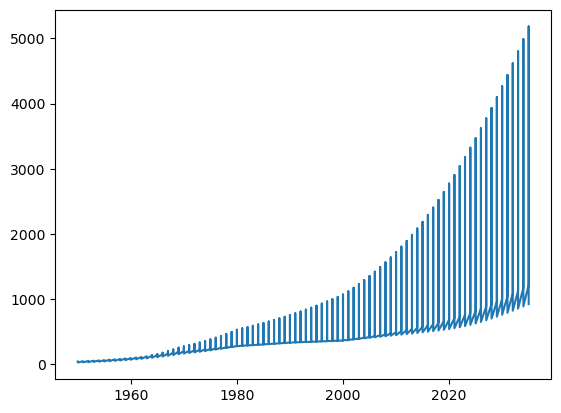

In [11]:
from matplotlib import pyplot as plt
plt.plot(df['year'],df['population'])

In [12]:
from sklearn.preprocessing import LabelEncoder
encoding  = LabelEncoder()
df['City'] = encoding.fit_transform(df[['City']])
df['City'] = encoding.fit_transform(df[['City']])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
df

,City,year,population
0,0,1950,45.887
1,1,1950,31.169
2,2,1950,30.621
3,0,1951,49.552
4,1,1951,34.691
...,...,...,...
253,1,2034,4989.296
254,2,2034,891.191
255,0,2035,1220.761
256,1,2035,5182.669


In [14]:

df2 = df[df['year'] <= 2023]

df2 = df2.reset_index()
df2["year"]= pd.to_datetime(df2.year, format='%Y')

In [15]:
train_df= df2.drop(columns=['index'])

In [16]:
train_df

,City,year,population
0,0,1950-01-01,45.887
1,1,1950-01-01,31.169
2,2,1950-01-01,30.621
3,0,1951-01-01,49.552
4,1,1951-01-01,34.691
...,...,...,...
217,1,2022-01-01,3041.789
218,2,2022-01-01,570.567
219,0,2023-01-01,762.981
220,1,2023-01-01,3181.250


In [17]:
df3 = df[df['year'] > 2023]

df3 = df3.reset_index()
df3["year"]= pd.to_datetime(df3.year, format='%Y')

In [18]:
test_df = df3.drop(columns=['index'])

In [19]:
test_df

,City,year,population
0,0,2024-01-01,792.350
1,1,2024-01-01,3324.219
2,2,2024-01-01,607.069
3,0,2025-01-01,823.625
4,1,2025-01-01,3470.866
5,2,2025-01-01,628.595
6,0,2026-01-01,856.727
7,1,2026-01-01,3621.323
8,2,2026-01-01,652.141
9,0,2027-01-01,891.557


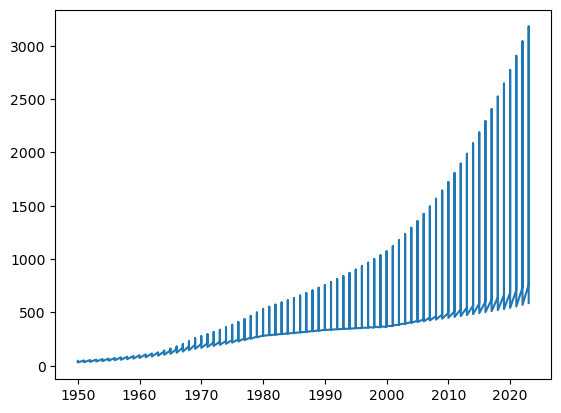

In [20]:
plt.plot(train_df['year'],train_df['population'])

In [21]:
test_population_values = test_df['population'].values

In [22]:
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
                             # set to stepwise
  

In [23]:
 stepwise=auto_arima(train_df['population'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,
                          stepwise = True)# we don't want convergence warnings
          
# To print the summary
stepwise.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2693.880, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1948.432, Time=0.56 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1809.140, Time=1.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1809.411, Time=3.28 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1898.609, Time=1.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.83 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.09 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=1811.138, Time=4.58 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  222
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -900.570
Date:                              Thu, 04 May 2023   AIC                           1809.140
Time:                                      09:28:07   BIC                           1822.509
Sample:                                           0   HQIC                          1814.545
                                              - 222                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.9303      0.043     45.028      0.000       1.846       2.014
ar.S.L24      -0.9350      0.046    -20.540      0.000      -1.024      -0.846
ma.S.L12      -0.2642      0.106     -2.490      0.013      -0.472      -0.056
sigma2       204.5981     16.752     12.214      0.000     171.765     237.431
===================================================================================
Ljung-Box (L1) (Q):                  36.29   Jarque-Bera (JB):                26.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model =  SARIMAX(train_df['population'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           population   No. Observations:                  222
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -900.570
Date:                              Thu, 04 May 2023   AIC                           1809.140
Time:                                      09:28:45   BIC                           1822.509
Sample:                                           0   HQIC                          1814.545
                                              - 222                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.9303      0.043     45.028      0.000       1.846       2.014
ar.S.L24      -0.9350      0.046    -20.540      0.000      -1.024      -0.846
ma.S.L12      -0.2642      0.106     -2.490      0.013      -0.472      -0.056
sigma2       204.5981     16.752     12.214      0.000     171.765     237.431
===================================================================================
Ljung-Box (L1) (Q):                  36.29   Jarque-Bera (JB):                26.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

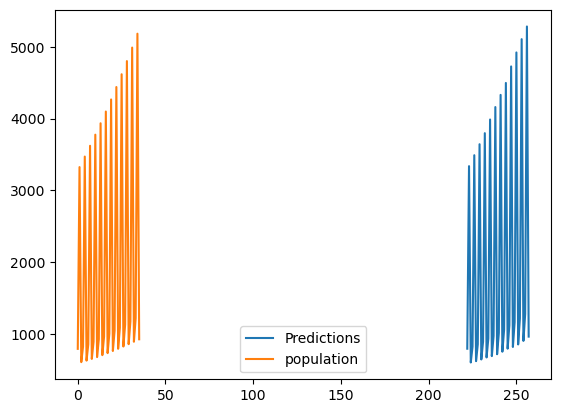

In [26]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test_df['population'].plot(legend = True)

In [27]:
predictions

222     794.164001
223    3337.366333
224     602.381618
225     823.677918
226    3489.693297
227     621.067713
228     856.623787
229    3642.817053
230     644.639354
231     892.735741
232    3796.776549
233     672.530869
234     936.366268
235    3987.222946
236     691.345993
237     972.624650
238    4160.616861
239     717.472915
240    1014.670981
241    4330.192337
242     752.515352
243    1061.600039
244    4496.538010
245     794.715722
246    1121.096313
247    4726.510968
248     818.532453
249    1165.168005
250    4921.435368
251     853.767186
252    1217.955280
253    5106.567399
254     902.944546
255    1277.696340
256    5283.266994
257     962.722026
Name: Predictions, dtype: float64

In [28]:
final=pd.DataFrame({'Actual':test_population_values,'Prediction':predictions})

In [29]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test_df["population"], predictions)
  
# Calculate mean squared error


45.83717298103482

In [30]:
# Calculate root mean squared error
mean_squared_error(test_df["population"], predictions)

2101.0464268933083

<AxesSubplot:>

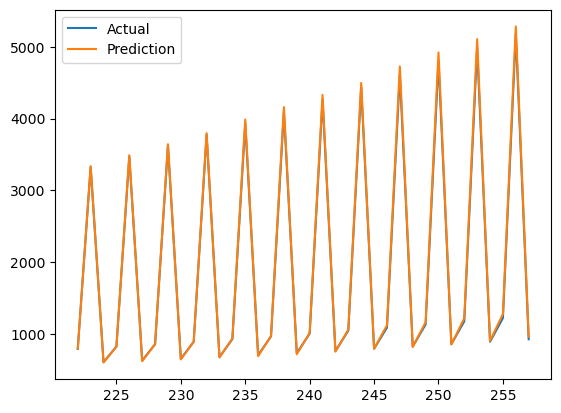

In [31]:
final.plot(legend = True)

In [32]:
final

,Actual,Prediction
222,792.350,794.164001
223,3324.219,3337.366333
224,607.069,602.381618
225,823.625,823.677918
226,3470.866,3489.693297
227,628.595,621.067713
228,856.727,856.623787
229,3621.323,3642.817053
230,652.141,644.639354
231,891.557,892.735741
